# <font color='black'> Recettes de Noël </font>

---

<img src="epice.jpg" align="right">





# Mission 
Votre mission sera de créer un nuage de mots d'aspect professionnel à partir d'un ensemble de données textuelles en Python. Vous utiliserez un ensemble de données open source contenant des recettes de Noël et créerez un nuage de mots des ingrédients les plus importants utilisés dans ces recettes.
Vous l'accomplirez en accomplissant chaque tâche du projet :

- Tâche 1 : Charger un ensemble de données JSON dans Python

- Tâche 2 : Nettoyer l'ensemble de donnéee

- Tâche 3 - Lemmatiser le texte

- Tâche 4 - Ajuster le modèle TF-IDF

- Tâche 5 - Créer un Word cloud


- TF-IDF donne un poids à chaque mot qui indique l'importance de ce terme. En utilisant à la fois la lemmatisation et TF-IDF, on peut trouver les mots importants dans l'ensemble de données textuelles et utiliser ces mots importants pour créer le nuage de mots. Par exemple, ces ensembles de données peuvent être des plaintes de clients et l'entreprise peut se concentrer sur les problèmes importants auxquels les clients sont confrontés. 
- Word cloud est une ressource puissante qui peut être utilisée dans les rapports et les présentations.

1. ( http://www.tfidf.com/), donne la formule de calcul TF-IDF et un exemple simple. 

2. Différence entre **stemming** et **lemmatizing**
- L'objectif à la fois de la **stemming** et **lemmatizing** est de réduire 
les formes flexionnelles et parfois les formes dérivées d'un mot à une forme de base commune.
Cependant, les deux mots diffèrent : 
    - **Stemming** fait généralement référence à un processus heuristique grossier qui coupe les extrémités des mots dans l'espoir d'atteindre correctement cet objectif la plupart du temps, et comprend souvent la suppression des affixes dérivationnels. 
    - **Lemmatizing** se réfère généralement à faire les choses correctement avec l'utilisation d'un vocabulaire et d'une analyse morphologique des mots, visant normalement à supprimer uniquement les terminaisons flexionnelles et à renvoyer la forme de base ou de dictionnaire d'un mot, connue sous le nom de lemme.
   
    
3. Word cloud  https://openclassrooms.com/fr/courses/6532301-introduction-to-natural-language-processing/6532308-build-your-first-word-cloud 

In [1]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer,PorterStemmer 
import pandas as pd
from nltk.stem.snowball import FrenchStemmer
from wordcloud import WordCloud, STOPWORDS as wc_stopwords, ImageColorGenerator
from nltk.corpus import stopwords as nltk_stopwords
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\e_goy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\e_goy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\e_goy\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## 0-1 Exemple Lemmatization

In [2]:
lemma=WordNetLemmatizer()
text=word_tokenize('The girls wanted to play with their parents .')
[lemma.lemmatize(word) for word in text ]

['The', 'girl', 'wanted', 'to', 'play', 'with', 'their', 'parent', '.']

In [3]:
[WordNetLemmatizer().lemmatize(word) for word in word_tokenize('The girls wanted to play with their parents')]

['The', 'girl', 'wanted', 'to', 'play', 'with', 'their', 'parent']

**Par défaut**, le lemmatizer de NLTK fait effet sur les noms, on peut lui spécifier d'autres PoS comme le verbe ou l’adjectif, et l’employer dans une composition de fonction comme suit :



In [4]:
[lemma.lemmatize(lemma.lemmatize(lemma.lemmatize(word), pos='a'),pos='v') for word in text ]

['The', 'girl', 'want', 'to', 'play', 'with', 'their', 'parent', '.']

In [5]:
words_ver=['give','giving','given','gave']
[lemma.lemmatize(word, pos='a') for word in words_ver]

['give', 'giving', 'given', 'gave']

## 0-2 Exemple Stemming

In [6]:
words=['trouble','troubling','troubled'] 
stem=PorterStemmer()
[stem.stem(word) for word in words]

['troubl', 'troubl', 'troubl']

In [7]:
words=['trouble','troubling','troubled','trobled'] 
stem=PorterStemmer()
[stem.stem(word) for word in words]

['troubl', 'troubl', 'troubl', 'trobl']

# 1-Projet Recettes

In [8]:
df=pd.read_json('recipes.json', lines=True)

In [9]:
df.head(2)

,Name,url,Description,Author,Ingredients,Method
0,Christmas pie,https://www.bbcgoodfood.com/recipes/2793/chris...,Combine a few key Christmas flavours here to m...,Mary Cadogan,"[2 tbsp olive oil, knob butter, 1 onion, finel...",[Heat oven to 190C/fan 170C/gas 5. Heat 1 tbsp...
1,Simmer-&-stir Christmas cake,https://www.bbcgoodfood.com/recipes/1160/simme...,An easy-to-make alternative to traditional Chr...,Mary Cadogan,"[175g butter, chopped, 200g dark muscovado sug...","[Put the butter, sugar, fruit, zests, juice an..."


In [10]:
df.Description.isna().sum()

188

In [69]:
#recup la description  et supprime le NaN
desc_df=df[['Ingredients']] 
desc_df=desc_df[desc_df['Ingredients'].notna()]

# sous forme de list
desc_lst=list(desc_df.Ingredients)



In [73]:
desc_df

,Ingredients
0,"[2 tbsp olive oil, knob butter, 1 onion, finel..."
1,"[175g butter, chopped, 200g dark muscovado sug..."
2,"[200g dark muscovado sugar, 175g butter, chopp..."
3,"[500g strong white flour, plus extra for dusti..."
4,"[280g self-raising flour, 175g golden caster s..."
...,...
1612,"[100g softened butter, 2-3 tbsp chopped fresh ..."
1613,"[3 medium-sized duckss (each about 2¼kg/5lb), ..."
1614,"[300g basmati rice, 8 eggs, 400g pack sliced s..."
1615,"[6 x 250g pkts unsalted butter, 2 tsp hot chil..."


In [74]:
desc_lst

[['2 tbsp olive oil',
  'knob butter',
  '1 onion, finely chopped',
  '500g sausagemeat or skinned sausages',
  'grated zest of 1 lemon',
  '100g fresh white breadcrumbs',
  '85g ready-to-eat dried apricots, chopped',
  '50g chestnut, canned or vacuum-packed, chopped',
  '2 tsp chopped fresh or 1tsp dried thyme',
  '100g cranberries, fresh or frozen',
  '500g boneless, skinless chicken breasts',
  '500g pack ready-made shortcrust pastry',
  'beaten egg, to glaze'],
 ['175g butter, chopped',
  '200g dark muscovado sugar',
  '750g luxury mixed dried fruit (one that includes mixed peel and glacé cherries)',
  'finely grated zest and juice of 1 orange',
  'finely grated zest of 1 lemon',
  '100ml/3½ fl oz cherry brandy or brandy plus 4tbsp more',
  '85g macadamia nut',
  '3 large eggs, lightly beaten',
  '85g ground almond',
  '200g plain flour',
  '½ tsp baking powder',
  '1 tsp ground mixed spice',
  '1 tsp ground cinnamon',
  '¼ tsp ground allspice'],
 ['200g dark muscovado sugar',
  '1

In [76]:
desc_f_lst=[]
for lst in desc_lst:
    desc_f_lst.extend(lst)
desc_f_lst
    

['2 tbsp olive oil',
 'knob butter',
 '1 onion, finely chopped',
 '500g sausagemeat or skinned sausages',
 'grated zest of 1 lemon',
 '100g fresh white breadcrumbs',
 '85g ready-to-eat dried apricots, chopped',
 '50g chestnut, canned or vacuum-packed, chopped',
 '2 tsp chopped fresh or 1tsp dried thyme',
 '100g cranberries, fresh or frozen',
 '500g boneless, skinless chicken breasts',
 '500g pack ready-made shortcrust pastry',
 'beaten egg, to glaze',
 '175g butter, chopped',
 '200g dark muscovado sugar',
 '750g luxury mixed dried fruit (one that includes mixed peel and glacé cherries)',
 'finely grated zest and juice of 1 orange',
 'finely grated zest of 1 lemon',
 '100ml/3½ fl oz cherry brandy or brandy plus 4tbsp more',
 '85g macadamia nut',
 '3 large eggs, lightly beaten',
 '85g ground almond',
 '200g plain flour',
 '½ tsp baking powder',
 '1 tsp ground mixed spice',
 '1 tsp ground cinnamon',
 '¼ tsp ground allspice',
 '200g dark muscovado sugar',
 '175g butter, chopped',
 '700g lu

In [77]:
#sous forme de string uni
desc_str=" ".join(desc_f_lst).lower()

In [78]:
len(desc_str)

925942051

In [ ]:
    #pour enlever les None de la liste
# desc_lst=list(filter(None, desc_lst))

In [79]:
def tok1(txt):
    tokenizer = nltk.RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(txt)

In [80]:
# tokenisation du string uni
desc_tok=tok1(desc_str)
len(desc_tok)

388345646

In [81]:
len(set(desc_tok))

3345

In [82]:
lemma=WordNetLemmatizer()
desc_lem=[lemma.lemmatize(word) for word in desc_tok ]
len(desc_lem)

In [ ]:
len(set(desc_lem))

In [ ]:
set(desc_lem)

In [ ]:
stopwords=wc_stopwords
stopwords.update(nltk_stopwords.words('english'))
len(stopwords)

227

In [ ]:
desc_stop=[word for word in desc_lem if word not in stopwords]
len(desc_stop)

20123

In [ ]:
wordcloud = WordCloud().generate(" ".join(desc_stop))

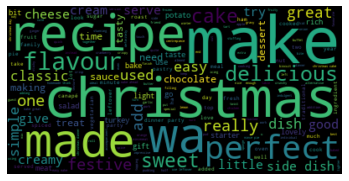

In [ ]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()